In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [6]:
Shanghai_data = pd.read_csv('data/ShanghaiPM20100101_20151231.csv')

In [7]:
Shanghai_data.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [14]:
Shanghai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 17 columns):
No               52584 non-null int64
year             52584 non-null int64
month            52584 non-null int64
day              52584 non-null int64
hour             52584 non-null int64
season           52584 non-null object
PM_Jingan        24700 non-null float64
PM_US_Post       34039 non-null float64
PM_Xuhui         25189 non-null float64
DEWP             52571 non-null float64
HUMI             52571 non-null float64
PRES             52556 non-null float64
TEMP             52571 non-null float64
cbwd             52572 non-null object
Iws              52572 non-null float64
precipitation    48575 non-null float64
Iprec            48575 non-null float64
dtypes: float64(10), int64(5), object(2)
memory usage: 6.8+ MB


In [9]:
Shanghai_data.columns = [c.replace(' ', '_') for c in Shanghai_data.columns]
Shanghai_data.head()


,No,year,month,day,hour,season,PM_Jingan,PM_US_Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [10]:
Shanghai_data['season'] = Shanghai_data['season'].map({1:'Spring', 2:'Summer', 3:'Autumn', 4: 'Winter'})
Shanghai_data.head()


,No,year,month,day,hour,season,PM_Jingan,PM_US_Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,Winter,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,Winter,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,Winter,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,Winter,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,Winter,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [11]:
# print the length of data
print("The number of row in this dataset is ",len(Shanghai_data.index))

# calculating the number of records in column "PM_Jingan"
print("The number of missing data records in PM_Jingan is: ", 
      len(Shanghai_data.index) - len(Shanghai_data['PM_Jingan'].dropna()))


The number of row in this dataset is  52584
The number of missing data records in PM_Jingan is:  27884


In [16]:
files = ['data/BeijingPM20100101_20151231.csv',
       'data/ChengduPM20100101_20151231.csv',
       'data/GuangzhouPM20100101_20151231.csv',
       'data/ShanghaiPM20100101_20151231.csv',
       'data/ShenyangPM20100101_20151231.csv']

out_columns = ['No', 'year', 'month', 'day', 'hour', 'season', 'PM_US Post']

# create a void dataframe
df_all_cities = pd.DataFrame()

# iterate to write diffrent files
for inx, val in enumerate(files):
    df = pd.read_csv(val)
    df = df[out_columns]
    # create a city column
    df['city'] = val.split('P')[0]
    # map season 
    df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Autumn', 4: 'Winter'})
    # append each file and merge all files into one
    df_all_cities = df_all_cities.append(df)
    
# replace the space in variable names with '_'
df_all_cities.columns = [c.replace(' ', '_') for c in df_all_cities.columns]

df_all_cities.head()  # 看一下处理后的数据，观察数据是否符合我们的要求


,No,year,month,day,hour,season,PM_US_Post,city
0,1,2010,1,1,0,Winter,NaN,data/Beijing
1,2,2010,1,1,1,Winter,NaN,data/Beijing
2,3,2010,1,1,2,Winter,NaN,data/Beijing
3,4,2010,1,1,3,Winter,NaN,data/Beijing
4,5,2010,1,1,4,Winter,NaN,data/Beijing


In [17]:
def filter_data(data, condition):
    """
    Remove elements that do not match the condition provided.
    Takes a data list as input and returns a filtered list.
    Conditions should be a list of strings of the following format:
      '<field> <op> <value>'
    where the following operations are valid: >, <, >=, <=, ==, !=
    
    Example: "duration < 15", "start_city == 'San Francisco'"
    """

    # Only want to split on first two spaces separating field from operator and
    # operator from value: spaces within value should be retained.
    field, op, value = condition.split(" ", 2)
    
    # check if field is valid
    if field not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(field))

    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")

    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data


In [18]:
def reading_stats(data, filters = [], verbose = True):
    """
    Report number of readings and average PM2.5 readings for data points that meet
    specified filtering criteria.
    
    
    Example: ["duration < 15", "start_city == 'San Francisco'"]
    """

    n_data_all = data.shape[0]

    # Apply filters to data
    for condition in filters:
        data = filter_data(data, condition)

    # Compute number of data points that met the filter criteria.
    n_data = data.shape[0]

    # Compute statistics for PM 2.5 readings.
    pm_mean = data['PM_US_Post'].mean()
    pm_qtiles = data['PM_US_Post'].quantile([.25, .5, .75]).as_matrix()
    
    # Report computed statistics if verbosity is set to True (default).
    if verbose:
        if filters:
            print('There are {:d} readings ({:.2f}%) matching the filter criteria.'.format(n_data, 100. * n_data / n_data_all))
        else:
            print('There are {:d} reading in the dataset.'.format(n_data))

        print('The average readings of PM 2.5 is {:.2f} ug/m^3.'.format(pm_mean))
        print('The median readings of PM 2.5 is {:.2f} ug/m^3.'.format(pm_qtiles[1]))
        print('25% of readings of PM 2.5 are smaller than {:.2f} ug/m^3.'.format(pm_qtiles[0]))
        print('25% of readings of PM 2.5 are larger than {:.2f} ug/m^3.'.format(pm_qtiles[2]))
        seaborn.boxplot(data['PM_US_Post'], showfliers=False)
        plt.title('Boxplot of PM 2.5 of filtered data')
        plt.xlabel('PM_US Post (ug/m^3)')

    # Return three-number summary
    return data


In [20]:
df_all_cities.head()

,No,year,month,day,hour,season,PM_US_Post,city
0,1,2010,1,1,0,Winter,NaN,data/Beijing
1,2,2010,1,1,1,Winter,NaN,data/Beijing
2,3,2010,1,1,2,Winter,NaN,data/Beijing
3,4,2010,1,1,3,Winter,NaN,data/Beijing
4,5,2010,1,1,4,Winter,NaN,data/Beijing


There are 35064 readings (13.34%) matching the filter criteria.
The average readings of PM 2.5 is 52.88 ug/m^3.
The median readings of PM 2.5 is 41.00 ug/m^3.
25% of readings of PM 2.5 are smaller than 26.00 ug/m^3.
25% of readings of PM 2.5 are larger than 67.00 ug/m^3.


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


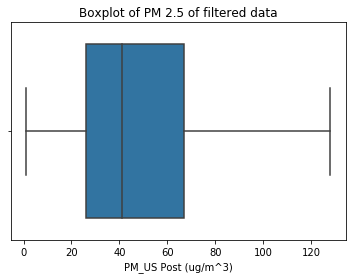

In [21]:
df_test = reading_stats(df_all_cities, ["city == 'data/Shanghai'", "year >= 2012"])

In [26]:
def univariate_plot(data, key = '', color = 'blue'):
    """
    Plot average PM 2.5 readings, given a feature of interest
    """
    
    # Check if the key exists
    if not key:
        raise Exception("No key has been provided. Make sure you provide a variable on which to plot the data.")
    if key not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(key))

    # Create plot
    plt.figure(figsize=(8,6))
    data.groupby(key)['PM_US_Post'].mean().plot(kind = 'bar', color = color)
    plt.ylabel('PM 2.5 (ug/m^3)')
    plt.title('Average PM 2.5 Reading by {:s}'.format(key), fontsize =14)
    plt.show()
    return None

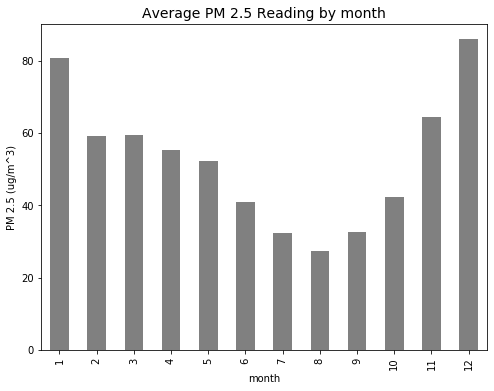

In [27]:
univariate_plot(df_test, 'month', 'grey')

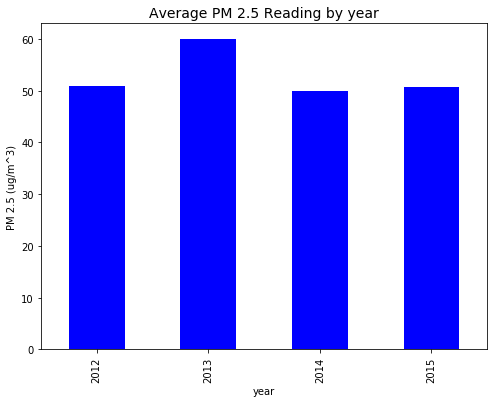

In [29]:
univariate_plot(df_test, 'year', 'blue')